# Word Embeddings (Word Vectors) in Python Tutorial

This tutorial walks through the estimating word embeddings, also known as vector representations of words, word2vec, or word vectors, as proposed by [Mikolov et al](https://arxiv.org/pdf/1301.3781.pdf). The purpose of this tutorial is to illustrate the architecture of the model and show how we can use the <b>gensim</b> module to estimate them. 

## Example ##

Consider the following sentences:

Example 1: <i>we think uncertainty about unemployment</i><br>
Example 2: <i>uncertainty and fears about inflation</i><br>
Example 3: <i>we think fears about unemployment</i><br>
Example 4: <i>we think fears and uncertainty about inflation and unemployment</i><br>

In total, there are 8 unique words: and, about, unemployment, uncertainty, fears, we,  inflation, think

## One-Hot Representation ##
One common way of representing words is with a <b>one-hot encoded</b> vector. This would be a vector of length 8 where each index represents one of the 8 unique words. We can represent each word with such a vector, with a 1 at the index of the word and zero everywhere else. 

For example, we can represent the word <i>fears</i> as follows:
$$
\small{\begin{array}{|cccccccc|}
 \text{and}  & \text{uncertainty} & \text{fears}& \text{we}& \text{about}& \text{unemployment}& \text{inflation}& \text{think} \\
\hline
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
\end{array}}$$

### Why use word vectors/embeddings? ###
One issue with this representation is how to relate two words. How is the word <i>fears</i> related to the word <i>uncertainty</i>? They both contain length 8, have a 1 only in one index and 0 everywhere else. Essentially, all individual words are the same distance from each other. If we use the one-hot encoded vectors to calculate the distances between words, <i>fears</i> would be the same distance to <i>think</i>; <i>fears</i> would be the same distance to <i>uncertainty</i>; and <i>uncertainty</i> would be the same distance to <i>we</i>

$$\small{\begin{array}{l|cccccccccccc|}
& \text{and}  & \text{uncertainty} & \text{fears}& \text{we}& \text{about}& \text{unemployment}& \text{inflation}& \text{think} \\
\hline
\text{fears} & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
\hline
\text{uncertainty} & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
\hline
\text{think} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}}$$

Word vectors, or [word embeddings](https://en.wikipedia.org/wiki/Word_embedding), solve this issue. They map words to some arbitrary H-dimensional space, $\mathbb{R}^H$, where semantic and syntactic similarities are preserved. Below provides an example of these 8 words mapped into a 3-Dimensional space. The 3-Dimensional vectors were obtained using the Skip-Gram model proposed by Mikolov et al. Notice, that words <i>fear</i> and <i>uncertainty</i> appear alongisde each, as do the words <i>inflation</i> and <i>unemployment</i>, suggesting similar meanings (with respect to their usage in sentences) through syntax and semantics. 

<img src="scatter.png">

## Overview of Skip-Gram Model to Obtain Word Embeddings ##

The Skip-Gram Model is one such way to create word embeddings. The model aims to understand the link between words in sentences, and their context. For example, in Example 1, <i>we think uncertainty about unemployment</i>, consider the word <i>uncertainty</i>. The words within it's immediate proximity are <i>think</i> and <i>about</i>. Word embeddings leverage the information that similar words typically show up with similar contexts. 

The Skip-Gram Model aims to use as input the one-hot encoded vector for the word <i>uncertainty</i> and output the word <i>think</i> and the word <i>about</i>, each represented as their own one-hot encoded vector. Let's take the input <i>uncertainty</i> and output <i>think</i>. Below is an image of the neural network at work (it might look daunting at first, so I'll try to explain each step below!).

### Example of 1 Training Example: Input <i>uncertainty</i>, Output <i>think</i>###
<img src="neural_net.png">

Each step in the neural network is known as a layer. 

### Input Layer ### 
Here we define the input, represented by a 8 length vector as above, with a one at the target word, <i>uncertainty</i>.

### Hidden Layer ###
This is the target word represented in the H-dimensional space, $\mathbb{R}^H$. In our example, we will use a 3-Dimensional space.

How do we get the Hidden Layer from the Input Layer of just a one-hot encoded vector. We multiply the Input Vector by a 3-by-8 matrix <b>we will call the $\mathbf{U}$ matrix</b>.

Input to Hidden Layer 

$\mathbf{U}\cdot x_{uncertainty}^\prime = \begin{bmatrix}
u^{and}_{1} & u^{uncertainty}_{1} & u^{fears}_{1} \cdot\cdot\cdot & u^{think}_{1} \\
u^{and}_{2} & u^{uncertainty}_{2} & u^{fears}_{2} \cdot\cdot\cdot & u^{think}_{2} \\
u^{and}_{3} & u^{uncertainty}_{3} & u^{fears}_{3} \cdot\cdot\cdot & u^{think}_{3} \\
   \end{bmatrix}
\small{
\begin{bmatrix}
     0  &   1 & \cdot \cdot \cdot & 0  \\
 and & uncertainty & \cdot\cdot \cdot & think 
\end{bmatrix}}^\prime$

$=
\begin{bmatrix}
u^{uncertainty}_{1}  &  u^{uncertainty}_{2}& u^{uncertainty}_{3}
\end{bmatrix}^\prime  = \mathbf{u_{uncertainty}^\prime}$

<b>NOTE</b> that since $\mathbf{U}$ is H-by-V in size, each column represents one of the words in our vocabulary. Since <i>uncertainty</i> is the third index in our input matrix, the third column of $\mathbf{U}$ represents <i>uncertainty</i> in our H-Dimensional space. <b>This H-Dimensional vector is the word embedding we are looking after</b>.

### Output Layer ###

We multiply the hidden layer, $\mathbf{u_{uncertainty}}$ by a 8-by-3 matrix <b>we will call the $\mathbf{\beta}$ matrix</b>.

Hidden Layer to Output

$\mathbf{\beta}\cdot \mathbf{u_{uncertainty}^\prime} = \begin{bmatrix}
\beta^{and}_{1} & \beta^{and}_{2}& \beta^{and}_{3} \\
\beta^{uncertainty}_{1} & \beta^{uncertainty}_{2} & \beta^{uncertainty}_{3} \\
\cdot \\
\cdot \\
\cdot \\
\beta^{think}_{1} & \beta^{think}_{2} & \beta^{think}_{3} 
   \end{bmatrix}
 \mathbf{u_{uncertainty}}$
 $
=\begin{bmatrix}
 \mathbf{\beta_{and}^\prime} \mathbf{u_{uncertainty}} &  \mathbf{\beta_{uncertainty}^\prime} \mathbf{u_{uncertainty}} & \cdot \cdot \cdot & \mathbf{\beta_{think}^\prime} \mathbf{u_{uncertainty}} 
\end{bmatrix}
$

### Output Probability ###

Because we want to be able to predict the words in the context of <i>uncertainty</i> in the sentence, i.e. <i>think</i> and <i>about</i>, we should handle this appropriately. One way is to normalize the values to probabilities by applying the [softmax function](https://en.wikipedia.org/wiki/Softmax_function). 

$\begin{array}{cccc}[\frac{exp(\mathbf{\beta_{and}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{\mathbf{\beta_{uncertainty}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&...&\frac{exp(\mathbf{\beta_{think}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}]\end{array}$

We know we wanted to predict the word <i>think</i> in this example, therefore we have the prediction and the target value.

$$\small{\begin{array}{l|cccccccc|}
& \text{and}  & \text{uncertainty} & \text{fears}& \text{we}& \text{about}& \text{unemployment}& \text{inflation}& \text{think} \\
\hline
\text{Input} & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
\hline
\text{Output} & \frac{exp(\mathbf{\beta_{and}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})} & \frac{exp(\mathbf{\beta_{uncertainty}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}& \frac{exp(\mathbf{\beta_{fears}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{exp(\mathbf{\beta_{we}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{exp(\mathbf{\beta_{about}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{exp(\mathbf{\beta_{unemployment}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{exp(\mathbf{\beta_{inflation}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\frac{exp(\mathbf{\beta_{think}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}&\\
\hline
\text{Target} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
\end{array}}$$

## Estimating U and $\mathbf{\beta}$ ##

Now I will discuss exactly how we can use these training examples to train the neural network and obtain good estimates fo the word embeddings, matrix $\mathbf{U}$. 

Without loss of generality, let's update just one training example, the word <i>uncertainty</i> in the sentence <i>we think uncertainty about unemployment</i>. Assume that the context is M=1, so that we assume the context are the words before and after the current word. So, in this case, the input is <i>uncertainty</i> and the context is <i>think</i> and <i>about</i>. 

We want to maximize the likelihood of observing these two words, conditional on <i>uncertainty</i>.

<b>GOAL:</b> 

$
\begin{align*}
  \max_{\mathbf{U},\mathbf{\beta}} p(about|uncertainty)p(think|uncertainty)
\end{align*}
$

What is $p(about|uncertainty)$? We calculated that above using the current estimates of $\mathbf{U}$ and $\mathbf{\beta}$. 

<b>GOAL:</b> 

$
\begin{align*}
  \max_{\mathbf{U},\mathbf{\beta}} \frac{exp(\mathbf{\beta_{about}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}\frac{exp(\mathbf{\beta_{think}^\prime} \mathbf{u_{uncertainty}})}{\sum_{n=1}^{8} exp(\mathbf{\beta_{n}^\prime} \mathbf{u_{uncertainty}})}
\end{align*}
$

It's much easier, we'll see, to maximize the $log$ of these quantities. Also, if we negate the previous expression and minimize the quantity nothing really changes. But the interpretation would be minimizing an error term. 

$
\begin{align*}
\min_{\mathbf{U},\mathbf{\beta}}  E &= -[log( p(think | uncertainty) )+log( p(about | uncertainty) )]\\
&=-[log\frac{exp(\beta_{think}^\prime u_{uncertainty})}{\sum_{j^\prime=1}^V exp(\beta_{j}^\prime u_{uncertainty})}+log\frac{exp(\beta_{about}^\prime u_{uncertainty})}{\sum_{j^\prime=1}^V exp(\beta_{j}^\prime u_{uncertainty})}] \\
&=-[v_{think}^\prime u_{uncertainty}-log(\sum_{j^\prime=1}^V exp(\beta_{j}^\prime u_{uncertainty}))+v_{about}^\prime u_{uncertainty}-log(\sum_{j^\prime=1}^V exp(\beta_{j}^\prime u_{uncertainty}))]
\end{align*}
$

### Updating specific word to understand mechanism ###
How do we change $\mathbf{\beta_{think}}$ given the current predictions?\\
$
\begin{align*}
\frac{\partial E}{\partial v_{think}^\prime} = -[u_{uncertainty} - 2\frac{exp(\mathbf{\beta_{think}}\mathbf{u_{unc.}})}{\sum_{n=1}^{V} exp(\mathbf{\beta_{n}}\mathbf{u_{unc.}})} u_{uncertainty}] = 2u_{uncertainty}(p(think|uncertainty)-\frac{1}{2})
\end{align*}$

More generally, we move around $\mathbf{U}$ and $\mathbf{\beta}$ so that the error improves (gradient descent)


$
\begin{align*}
\mathbf{\beta}^{new} = \mathbf{\beta}^{old} - \alpha\frac{\partial E}{\partial \mathbf{\beta}^{old}} \\
\mathbf{U}^{new} = \mathbf{U}^{old} - \alpha\frac{\partial E}{\partial \mathbf{U}^{old}}
\end{align*}
$

### General Updating $\mathbf{\beta}$ Matrix ###

$
\begin{align*}
\frac{\partial E}{\partial \mathbf{\beta}} &= \sum_{m=-M}^{M}(\mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m})\frac{\partial \mathbf{\beta}\mathbf{u_{uncertainty}}}{\partial \mathbf{\beta}} = \sum_{m=-M}^{M}(\mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m})\mathbf{u_{uncertainty}^\prime}
\end{align*}
$

Thus, we will update $\mathbf{\beta}$ as follows:

$
\begin{align*}
\mathbf{\beta}^{new} = \mathbf{\beta}^{old} - \alpha [\sum_{m=-M}^{M}\delta_m^2 u_{uncertainty}^\prime] 
\end{align*}
$

where $\delta_m^2= \mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m}$

### General Updating U Matrix ###

$
\begin{align*}
\frac{\partial E}{\partial \mathbf{U}} &= \sum_{m=-M}^{M}(\mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m})\frac{\partial \mathbf{\beta}\mathbf{u_{uncertainty}}}{\partial \mathbf{U}} = \sum_{m=-M}^{M}\mathbf{\beta}^\prime(\mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m})\frac{\partial \mathbf{u_{uncertainty}}}{\partial \mathbf{U}} = \sum_{m=-M}^{M}\mathbf{\beta}^\prime(\mathbf{\beta}\mathbf{u_{uncertainty}}-x_{w_m})\frac{\partial \mathbf{U}x_{uncertainty}}{\partial \mathbf{U}} \\
&= \sum_{m=-M}^{M}\mathbf{\beta}^\prime \delta_m^2 \circ x_{uncertainty}
\end{align*}
$

where $\circ$ is the [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29).


Thus, we will update U as follows:

$
\begin{align*}
\mathbf{U}^{new} = \mathbf{U}^{old} - \alpha [\sum_{m=-M}^{M} \mathbf{V^T} \delta_m^2 x_{uncertainty}^\prime] 
\end{align*}
$

## Implementation in Python ##

First, let's load the relevant libraries.

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from nltk.tokenize import sent_tokenize
%matplotlib inline

C:\Users\Paul\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Now let's load the data. First, we will use a relatively small text file taken from the <a href=https://en.wikipedia.org/wiki/Harry_Potter>plot summary of Harry Potter</a>. 


<b>NOTE</b>: Seeing as the last movie of the main plotline came out in 2011, I figured it's well past the time to spoil anything. But for you muggles who may be waiting to watch it, SPOILER ALERT, mild spoilers may await you in this tutorial).

In [17]:
df = pd.read_csv("sample_texts.csv", sep=None)

df.head()

C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Parag_Num,Text
0,1,The central character in the series is Harry P...
1,2,Harry becomes a student at Hogwarts School of ...
2,3,Each novel chronicles one year in Harry's life...
3,4,The environment Rowling created is intimately ...
4,5,"When the first novel of the series, Harry Pott..."


Next, we will preprocess the text in two ways. First, the <b>gensim</b> model requires us to input a list of a list of tokens ([["this","is","first","sentence"],["now","the","second","sentence"],["you","got","it","?"]]). So first, we will separate each text into a list of sentences. Second, we will preprocess each sentence to remove punctuation, lowercase, and tokenize.

In [19]:
def generate_tokens(sentence_list):
    """ This function returns a list of lists of
    clean tokens"""
    final_tokens = []
    for sentence in sentence_list:
        new_text = re.sub("[^A-Za-z]"," ", sentence)
        tokens = new_text.lower().split()
        tokens = [el for el in tokens if el not in sw]
        if tokens!=[]:
            final_tokens.append(tokens)
    return final_tokens

sw = set(stopwords.words("english"))

df["sentences"] = df.Text.apply(lambda x: sent_tokenize(x))
df["clean_tokens"] = df.sentences.apply(generate_tokens)

df.head()

,Parag_Num,Text,sentences,clean_tokens
0,1,The central character in the series is Harry P...,[The central character in the series is Harry ...,"[[central, character, series, harry, potter, b..."
1,2,Harry becomes a student at Hogwarts School of ...,[Harry becomes a student at Hogwarts School of...,"[[harry, becomes, student, hogwarts, school, w..."
2,3,Each novel chronicles one year in Harry's life...,[Each novel chronicles one year in Harry's lif...,"[[novel, chronicles, one, year, harry, life, p..."
3,4,The environment Rowling created is intimately ...,[The environment Rowling created is intimately...,"[[environment, rowling, created, intimately, c..."
4,5,"When the first novel of the series, Harry Pott...","[When the first novel of the series, Harry Pot...","[[first, novel, series, harry, potter, philoso..."


Now, we can feed the clean_tokens into the Word2Vec model from gensim. To combine the entire column of "clean_tokens", we can simply run <b>df["clean_tokens"].sum()</b>, and you will see it creates one giant list, where each element is a list which pertains to a sentence. That sentence is then a list of tokens. 

Some useful parameters for which we can adjust with Word2Vec (among many, for the complete list see the <a href=https://rare-technologies.com/word2vec-tutorial/>gensim Word2Vec documentation</a>)

* size: dimension of the word embeddings. Mikolov et al. recommend this to be between 100-300. If your sample of documents is really small (like in our case with Harry Potter), it will be difficult to get insights in the 100-300 dimensional space. For that reason, in this tutorial, we will project them onto a smaller 4 dimensional space immediately.

* sg: whether or not you want to estimate the Skip Gram model or the Continuous Bag of Words model. The main difference is if you want to use a target word to predict the context words (Skip Gram) or use the context words to predict the target word (CBOW).

* min_count: Ignores all words with total frequency lower than this. With our Harry Potter plot, very few words show up multiple times. This will be an important parameter for us to mess around with. 

* window: The maximum distance to use for predictions. For example, if window=2, and using the Skip Gram model, the unsupervised prediction task will be to predict two words to the left using the target word, one word to the left using the target word, one word to the right using the target word, and two words to the right using the target word. 

(NOTE: Word2Vec does have a stochastic component to it, so I am seeding the procedure with the number 1234 so you can replicate these results). 

In [44]:
model = Word2Vec(df["clean_tokens"].sum(), size=4, sg=1,window=2, min_count=2, seed=1234)

That's it! We estimated the word embeddings onto a 4 Dimensional space. Note the window size and min_count we are using in this example. I would suggest you mess around with this to see the different results. 

Unfortunately, anything above the 3rd dimension is hard for any muggle to visualize. Fortunately, several techniques exist to project higher dimensions onto a 2 dimension space, such as <a href=https://en.wikipedia.org/wiki/Principal_component_analysis>Principal Component Analysis</a> or <a href=https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding>t-distributed stochastic neighbor embedding</a>. Let's apply one of those techniques, t-SNE. 

This technique works by looking at how far apart each object is in the higher dimension (in our case, 4D), and then tries to mimic those distances in the 2-D space. (NOTE: TSNE does have a stochastic component to it, so I am seeding the procedure with the number 1234 so you can replicate these results). 

In [45]:
# Get list of words for annotation of the scatter plot
vocab = list(model.wv.vocab)
X = model[vocab]

# Project them onto the 2 Dimensional space
tsne = TSNE(n_components=2,random_state=1234)
X_tsne = tsne.fit_transform(X)
# Create a DataFrame with words as index, and
# 2 dimensions as main columns (x-axis, y-axis)
scatter_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Let's see what these 2 Dimensional vectors look like. 

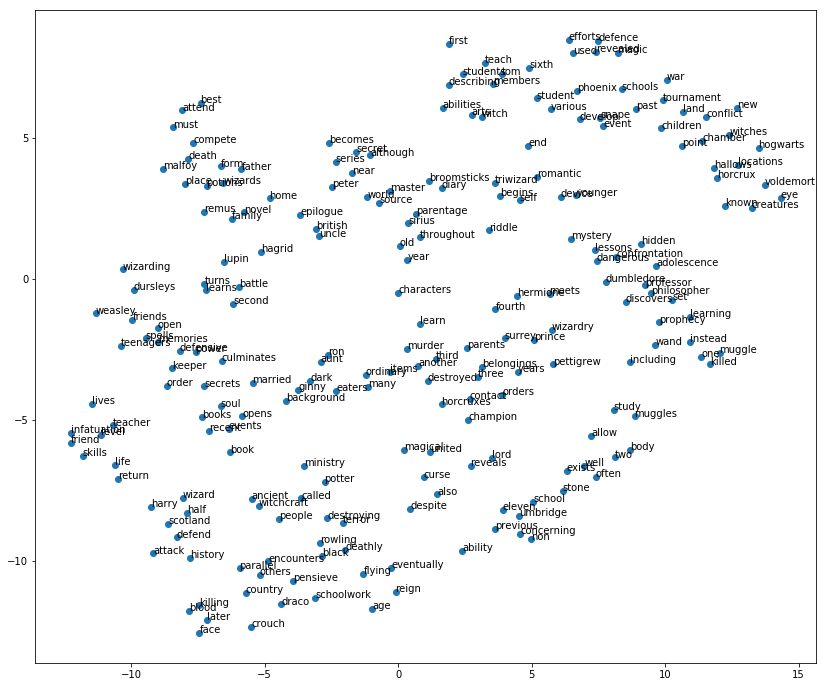

In [46]:
# Plot the figure
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scatter_df['x'], scatter_df['y'])

# Annotate each point with its word
for word, pos in scatter_df.iterrows():
    ax.annotate(word, pos)
plt.show()

Great! So now you can see the 2-Dimensional representation of these 4-Dimensional objects. 

We can see a few things. First, "harry" is on the bottom left (circa  -10,-10) right next to the words "half" and "wizard". Quite fitting, wouldn't you say? (spoiler: Yes, Harry is half-blood). On the very right, (near 15, 5) you see Hallows next to Horcrux (there's a link between these two things, the Horcruxes are linked to a prophecy called the Deathly Hollows), which has tons to do with Voldemort (sorry for naming him!), as is evident in the scatter plot. There's loads more to assess from this scatter plot but I'll leave that up to you to see more of these relationships.

Say we didn't want to use the scatter plot to find relationships of these words. What else can we do? 

Let's think back to the 4-D space now, where the word embeddings lie originally after estimating the model. Word Embeddings are also extremely powerful in their ability to understand syntactic and semantic relationships. For example, the original Mikolov et al. research paper introducing these word embeddings, sets up analogies that the word embeddings pick up on. <i>king is to man as woman is to what?</i> and the word embeddings predict <i>queen</i>. How does it do this? Since in this H-Dimensional space, each word is represented as a vector, we can perform vector operations mimicing these analogies. Thus it simply estimates a 4-dimensional vector comprised of <i>vector(king)-vector(man)+vector(woman)</i> and then in the 4-D space, it finds which word vector is closest to that newly created vector. Thus, it is <i>vector(queen)</i>. 

Let's try this out in our 4-D harry potter word embeddings:

In [115]:
print(model.wv.most_similar(positive=["horcrux","voldemort"], topn=1))

[('hallows', 0.9759405851364136)]


In [102]:
print(model.wv.most_similar(positive=["harry","voldemort"], topn=5))

[('killing', 0.9857566356658936), ('later', 0.9800744652748108), ('draco', 0.9792900681495667), ('blood', 0.9774438142776489), ('face', 0.9759806394577026)]


In [113]:
print(model.wv.most_similar(positive=["dumbledore","voldemort"],negative=["horcrux"], topn=1))

[('lessons', 0.9809353351593018)]


There you have it. You might be wondering, this is all neat and all, but how could I use this:

* Say you don't want to use a dictionary of words which mean "good" to measure sentiment. Who's to say there's only 100 list of "positive" words and these are them? So, you can use this to estimate word embeddings for a LARGE corpus, and then find top 100 words (or 10, 5, ...) which are closest semantically and syntactically to the word "good". Then count these words and see if this is a better way of measuring sentiment.

* Say you are a detective and receive loads of emails from a potential suspect who always uses a code word "pizza" for the word "crime". You don't know what "pizza" is code for though. You run a word embeddings model using the entire history of emails, and sometimes they slipped up and accidentally used the word "crime" in their writing. A word embedding model might pick this up and project the word "crime" and "pizza" into the same space and you will detect these two words mean the same thing. 

* You want to predict which word will be used next in a sequence of words. For example, "the capital of Germany is" and the word embedding model will see which vector is closest to <i>vector(the)+vector(capital)+vector(of)+vector(Germany)+vector(is)</i> and if you're training data is large enough, it could predict Berlin for you.

## Main Takeaways

* Difference between Skip Gram and CBOW models
* Estimating Word2Vec with Gensim
       * Understand the main parameters such as size, window, sg, min_count
* Reducing the dimensions further of the word embeddings using t-SNE
* Creating relationships or analogies using the <b>most_similar</b> method